The aim of this project is try try out various Data Visualisation Techniques. This also serves as a Refresher for myself regarding Pandas, Matplotlib and NumPy.

### 1. Importing

In [1148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

births_df = pd.read_csv('assets/US_births_1994-2003_CDC_NCHS.csv')

***

### 2. Exploring Dataset

In this section, the goal is just to have a brief look through the dataset to get a gist of what it contains.

In [1149]:
# Finding Header
print(births_df.columns)

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')


In [1150]:
# Finding out the dimensions of the Dataset
print(f"There are {births_df.shape[0]} rows and {births_df.shape[1]} columns")

There are 3652 rows and 5 columns


In [1151]:
# Taking a look at the first 4 rows
print(births_df.head(4))
print(f'\n')

# Taking a look at the last 4 rows
print(births_df.tail(4))
print(f'\n')

   year  month  date_of_month  day_of_week  births
0  1994      1              1            6    8096
1  1994      1              2            7    7772
2  1994      1              3            1   10142
3  1994      1              4            2   11248


      year  month  date_of_month  day_of_week  births
3648  2003     12             28            7    7645
3649  2003     12             29            1   12823
3650  2003     12             30            2   14438
3651  2003     12             31            3   12374




By taking a look at the 'head' and the 'tail' of the dataset, we are able to know the range of the values. In this case, we know that the dataset ranges from the date 01/01/1994 to 31/12/2003. 

Alternatively, we can simply print it to get the rough look of the head and tail as well using `print(births_df)`. This will also give us the dimensions.

In [1152]:
print(births_df)

      year  month  date_of_month  day_of_week  births
0     1994      1              1            6    8096
1     1994      1              2            7    7772
2     1994      1              3            1   10142
3     1994      1              4            2   11248
4     1994      1              5            3   11053
...    ...    ...            ...          ...     ...
3647  2003     12             27            6    8646
3648  2003     12             28            7    7645
3649  2003     12             29            1   12823
3650  2003     12             30            2   14438
3651  2003     12             31            3   12374

[3652 rows x 5 columns]


Now, we take a look at the given stats in the dataset using `df.describe()`.

In [1153]:
# Finding out the overall stats
print(births_df.describe())

              year        month  date_of_month  day_of_week        births
count  3652.000000  3652.000000    3652.000000  3652.000000   3652.000000
mean   1998.499726     6.523549      15.727820     3.999726  10876.817360
std       2.872293     3.449005       8.800529     2.000753   1858.566631
min    1994.000000     1.000000       1.000000     1.000000   6443.000000
25%    1996.000000     4.000000       8.000000     2.000000   8844.500000
50%    1998.500000     7.000000      16.000000     4.000000  11615.000000
75%    2001.000000    10.000000      23.000000     6.000000  12274.250000
max    2003.000000    12.000000      31.000000     7.000000  14540.000000


In [1154]:
# Finding year & day with highest & lowest number of births
print(births_df.sort_values('births'))

      year  month  date_of_month  day_of_week  births
2915  2001     12             25            2    6443
2550  2000     12             25            1    6566
3645  2003     12             25            4    6628
3280  2002     12             25            3    6629
2184  1999     12             25            6    6674
...    ...    ...            ...          ...     ...
3552  2003      9             23            2   14036
3532  2003      9              3            3   14119
3545  2003      9             16            2   14145
3650  2003     12             30            2   14438
2077  1999      9              9            4   14540

[3652 rows x 5 columns]


From this, we can determine that: 
<br> On 25 Dec 2001, Tuesday, it had the lowest number of births 
<br> On 9 Sept 1999, Thursday, it has the highest number of births

***

### 3. Cleaning Dataset

Although this Dataset was obtained from a reliable source, we still do the usual of looking through and ensuring that the Dataset is clean.
<br/>
Things that we're looking out for:

1. There is no row with NaN or missing data.
2. There is indeed data from the years {1994} to {2003}.
3. It accounts for everyday of the week, from Monday to Sunday.

Firstly, we resolve point 1.

In [1155]:
births_df = births_df.dropna()
print(f"now, all the rows with any field empty will have been removed")

now, all the rows with any field empty will have been removed


Now, we're just doing a simple check through for points 2. and 3.

In [1156]:
years = births_df.year.unique().tolist()
print(years)

[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]


In [1157]:
print(births_df.day_of_week.unique())

[6 7 1 2 3 4 5]


In [1158]:
days = births_df.date_of_month.unique().tolist()
print(days)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


***

### 4. Sorting & Plotting Dataset

For the purpose of this dataset, there are few interesting things I think would be useful to be seen visualised. 
</br> 
in the following format of {y} against {x}:

1. Total number of births against year
2. Average number of births against year
3. Average number of births against day of the week
4. Average number of births against month of the year

Therefore, we need to split the original dataset into seperate datasets. For a majority of these graphs, a Bar Graph would be the most useful.

In [1159]:
def plot_bargraph(dataset: pd.DataFrame, x_axis: str, y_axis: str, y_lim: list[int], labels: list[str], width: float=0.5) -> None:
    plt.bar(dataset[x_axis], dataset[y_axis], width, color='salmon')
    plt.ylim(y_lim)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(labels[2])
    plt.show()

#### 4.1. Graph of Total Number of Births against Year

In [1160]:
# First, we create a new dataframe that contains the total number of births for the corresponding years 
births_against_year_df = births_df.groupby(['year'])['births'].sum().reset_index()

print(births_against_year_df)

   year   births
0  1994  3952767
1  1995  3899589
2  1996  3891494
3  1997  3880894
4  1998  3941553
5  1999  3959417
6  2000  4058814
7  2001  4025933
8  2002  4021726
9  2003  4089950


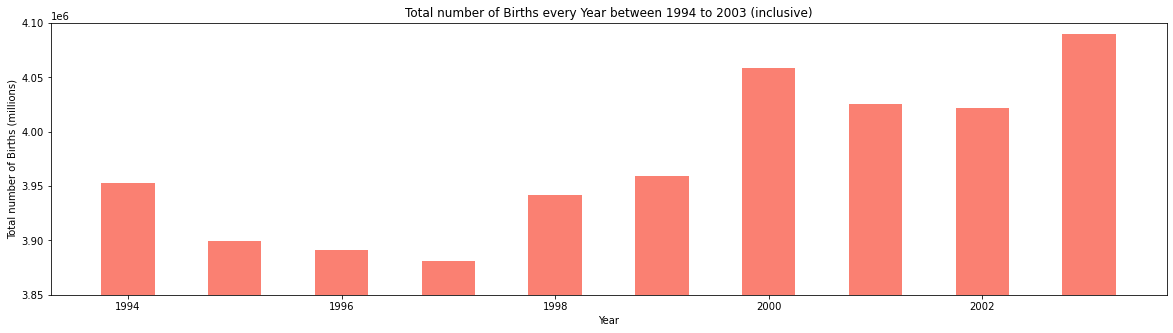

In [1161]:
fig = plt.figure(figsize = (20, 5))
plot_bargraph(births_against_year_df, 
        'year', 
        'births', 
        [3850000, 4100000], 
        ['Year','Total number of Births (millions)', 'Total number of Births every Year between 1994 to 2003 (inclusive)']
        )

Visually, we are able to see that 2003 is the year with the highest amount of Births and 1997 is the year with the least.

#### 4.2 Graph of Average number of Births against Year

In [1162]:
# We create a new dataframe that contains the average number of births for the corresponding years 
avg_births_against_year_df = births_df.groupby(['year'])['births'].mean().reset_index().sort_values('births')

print(avg_births_against_year_df)

   year        births
2  1996  10632.497268
3  1997  10632.586301
1  1995  10683.805479
4  1998  10798.775342
0  1994  10829.498630
5  1999  10847.717808
8  2002  11018.427397
7  2001  11029.953425
6  2000  11089.655738
9  2003  11205.342466


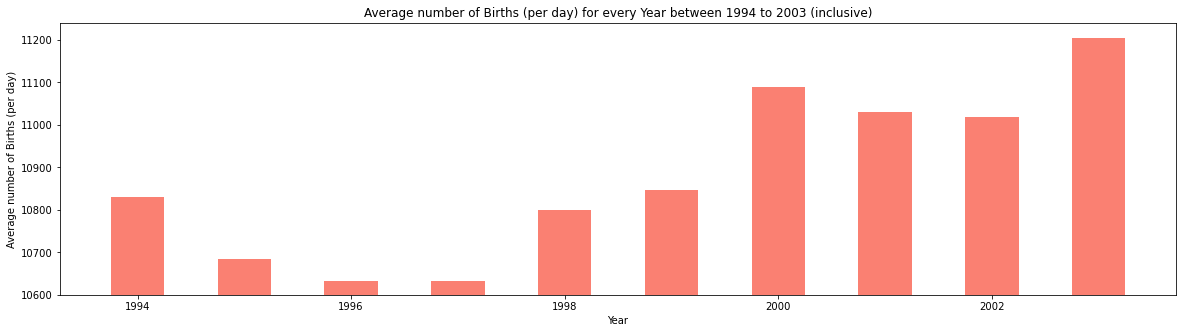

In [1163]:
graph2 = births_df.groupby(['year'])['births'].mean().reset_index()
fig = plt.figure(figsize = (20, 5))
plot_bargraph(avg_births_against_year_df, 
        'year', 
        'births', 
        [10600, 11240], 
        ['Year','Average number of Births (per day)', 'Average number of Births (per day) for every Year between 1994 to 2003 (inclusive)']
        )

This time around, it is harder to see via just observation whether 1996/1997 is the year with the least. However, we know that 2003 is still the year with the most.
</br> In this case, thankfully, we are able to see the exact numbers so we know that 1996 is the year with the least average number of Births.

This fact is interesting because 1997 was the year with the least **Total Number** of Births but 1996 was the year with the least **Average Number** of Births.

#### 4.3 Graph of Average Number of Births against the Day of the Week

In [1164]:
# We create a new dataframe that contains the average number of births for the corresponding day of the week
avg_births_against_dotw_df = births_df.groupby(['day_of_week'])['births'].mean().reset_index()

# We add a new column denoting the actual Names for the day of the week as opposed to integer values so that it is clearer when visualised.
avg_births_against_dotw_df['day'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print(avg_births_against_dotw_df)

   day_of_week        births        day
0            1  11090.356322     Monday
1            2  12349.034483    Tuesday
2            3  12112.749042  Wednesday
3            4  12069.921305   Thursday
4            5  11964.792706     Friday
5            6   8739.676245   Saturday
6            7   7815.561303     Sunday


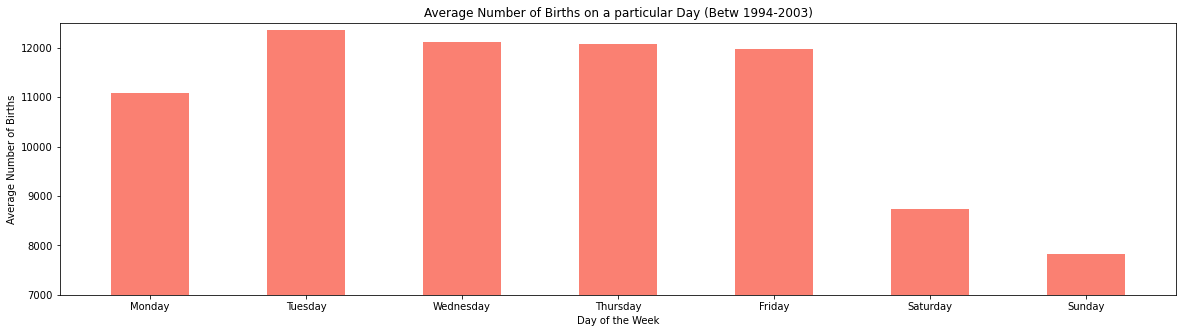

In [1165]:
fig = plt.figure(figsize = (20, 5))
plot_bargraph(avg_births_against_dotw_df, 
        'day', 
        'births', 
        [7000,12500], 
        ['Day of the Week','Average Number of Births', 'Average Number of Births on a particular Day (Betw 1994-2003)'],
        )

Now this is a cool observation! The weekends has the least average Number of Births. Is this just a coincidence? Well, to find out more, we will need to test this on more datasets.

#### 4.4 Graph of Average Number of Births against the Day of the Month

In [1166]:
# We create a new dataframe that contains the average number of births for the corresponding day of the week
avg_births_against_dotm_df = births_df.groupby(['date_of_month'])['births'].mean().reset_index().sort_values('births')

print(avg_births_against_dotm_df)

    date_of_month        births
24             25  10600.966667
0               1  10637.975000
12             13  10647.366667
30             31  10667.085714
25             26  10706.633333
23             24  10734.025000
3               4  10734.616667
1               2  10739.491667
22             23  10777.416667
26             27  10786.625000
4               5  10832.941667
8               9  10860.766667
5               6  10870.616667
2               3  10870.825000
27             28  10897.375000
6               7  10920.491667
28             29  10921.080357
29             30  10928.136364
7               8  10935.808333
10             11  10953.008333
15             16  10959.933333
21             22  10978.175000
11             12  10986.975000
18             19  10989.391667
14             15  10993.091667
13             14  11001.275000
9              10  11006.366667
20             21  11024.141667
19             20  11040.175000
16             17  11041.275000
17      

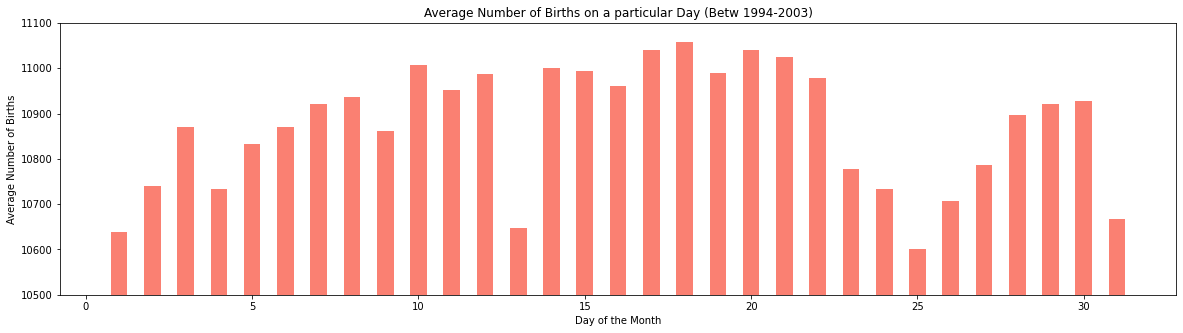

In [1167]:
fig = plt.figure(figsize = (20, 5))
plot_bargraph(avg_births_against_dotm_df, 
        'date_of_month', 
        'births', 
        [10500,11100], 
        ['Day of the Month','Average Number of Births', 'Average Number of Births on a particular Day (Betw 1994-2003)'],
        )

From obversation, we know that 25th has the least and 18th has the most. An interesting trend thing to note is that it is mostly increasing from the 1st to 23rd of a month. Both the ends of the months have a low number of Births as well.

***

### 5. More Vigorous Sorting(Filtering) & Plotting of Dataset

Now that we've looked through the normal Datasets and answered some basic questions, let's do something more interesting. Let us filter through the data for specific scenarios.

1. Number of occurences of >= 10000 births on a Monday
2. Number of occurences of < 10000 births on a Monday
3. Number of occurences of >= 10000 births for the First Day of a Month
4. Number of occurences of < 10000 births for the First Day of a Month

In [1168]:
def plot_stemgraphs_noniterative(x_axis: list[str], y_axis: list[int], labels: list[str], plot_num: int) -> None:
    plt.bar(x_axis, y_axis, width = 1.0, color = 'salmon')
    plt.subplot(1, 2, plot_num+1)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(labels[2])

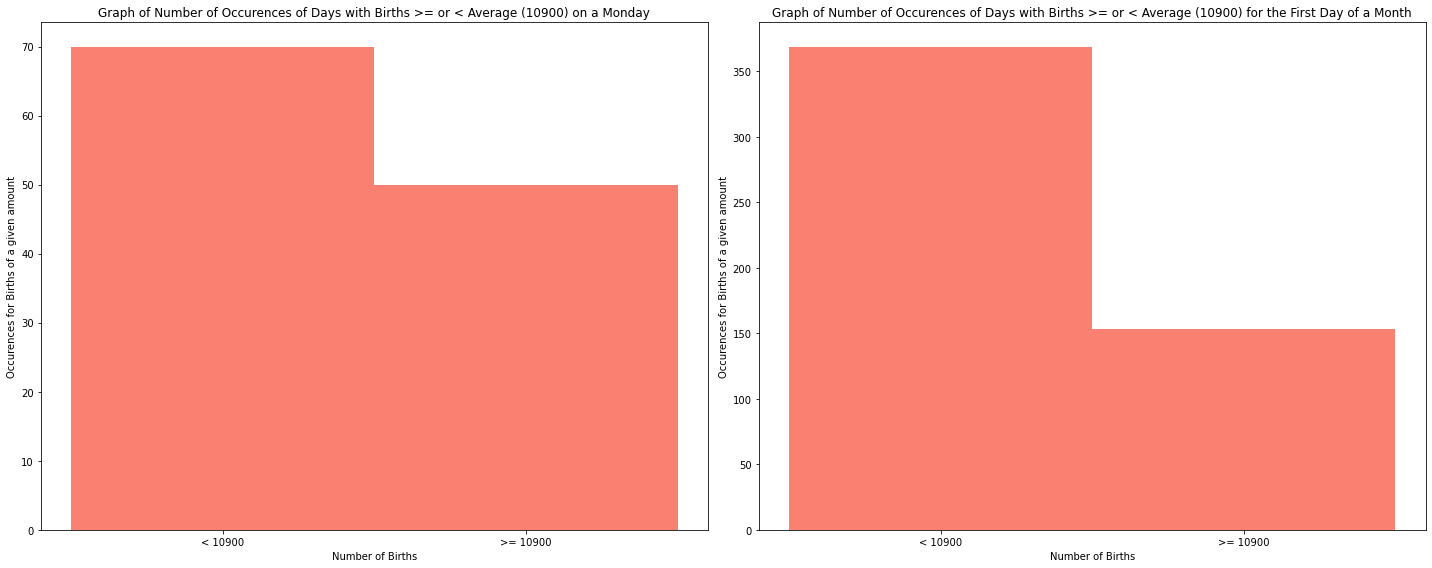

In [1169]:
# Counting value for 1. and 2.
num_births_mt11000_dotw = len(births_df[(births_df.births >= 10900) & (births_df.day_of_week == 1)].index)
num_births_lt11000_dotw = len(births_df[(births_df.births < 10900) & (births_df.day_of_week == 1)].index)

# Counting value for 3. and 4.
num_births_mt11000_day1 = len(births_df[(births_df.births >= 10900) & (births_df.date_of_month == 1)].index)
num_births_lt11000_day1 = len(births_df[(births_df.births < 10900) & (births_df.date_of_month == 1)].index)

# Creating params for Graph
x_axis = [['< 10900', '>= 10900'], ['< 10900', '>= 10900']]
y_axis = [[num_births_mt11000_dotw, num_births_lt11000_dotw], [num_births_mt11000_day1, num_births_lt11000_day1]]
labels = [
        ['Number of Births', 'Occurences for Births of a given amount','Graph of Number of Occurences of Days with Births >= or < Average (10900) on a Monday'],
        ['Number of Births', 'Occurences for Births of a given amount', 'Graph of Number of Occurences of Days with Births >= or < Average (10900) for the First Day of a Month']
        ]

# Creation of the Dataset for a clearer understanding of the numbers if need be
final_df = pd.DataFrame()
final_df['labels'] = ['dotw', 'dotw', 'dotm', 'dotm']
final_df['>= 10900'] = [num_births_mt11000_dotw, pd.NA, num_births_lt11000_dotw, pd.NA]
final_df['< 10900'] = [pd.NA, num_births_mt11000_day1, pd.NA, num_births_lt11000_day1]
final_df = final_df.set_index('labels')

# Setting number of rows and cols for subplot
plt.subplots(1, 2, figsize = (20,8))

# Ploting iteratively
for plot_num in range(0, 2):
    plot_stemgraphs_noniterative(x_axis[plot_num], y_axis[plot_num], labels[plot_num], plot_num)

plt.tight_layout()
plt.show()

From this, we observe something very significant. On the first day of every Month, there is a high chance that there will be less than the average number of births of 10876.817360 ~ 10900. 

***

### 6. Spotting Trends

In this section, we will replot the past few graphs, but of a different type to better observe trends.

#### 6.1 Does the Year affect the Total Number of Births?

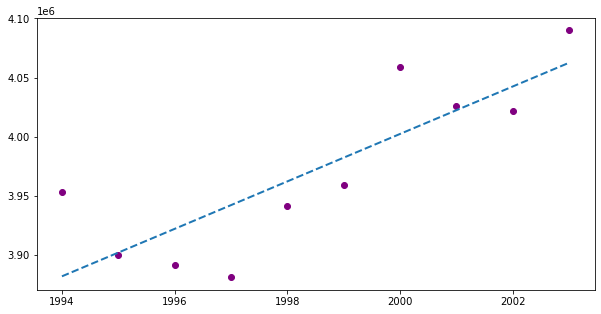

In [1170]:
fig = plt.figure(figsize = (10, 5))
x = births_against_year_df['year'] 
y = births_against_year_df['births']

# Formulating the bestfit line
a, b = np.polyfit(x, y, 1)

# Plot scatterplot of the dataset
plt.scatter(x, y, color='purple')

# Drawing bestfit line onto graph
plt.plot(x, a*x+b, linestyle='--', linewidth=2)
plt.show()

This linear best fit line doesn't really work. This means that the relationship between the Year and the Total number of Births isn't Linear. Therefore, it makes sense to perform Polynomial Regression Instead.

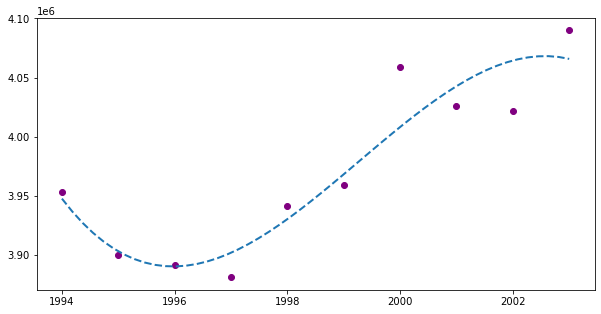

In [1171]:
fig = plt.figure(figsize = (10, 5))

# Formulating the polynomial fit line of degree {3}
model = np.poly1d(np.polyfit(x, y, 3))
polyline = np.linspace(1994, 2003)

# Plot scatterplot of the dataset
plt.scatter(x, y, color='purple')

# Drawing polynomial fit onto graph
plt.plot(polyline, model(polyline), linestyle='--', linewidth=2)
plt.show()

#### 6.2 Does the Day of the Month determine the Number of Births for that particular day?

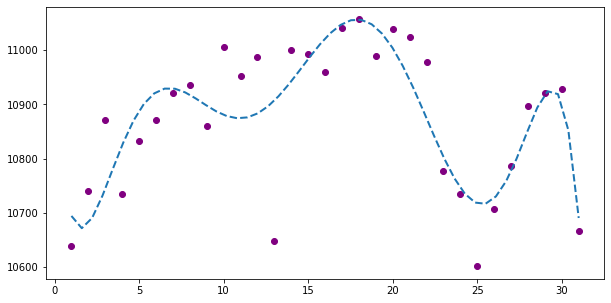

In [1172]:
fig = plt.figure(figsize = (10, 5))
x = avg_births_against_dotm_df['date_of_month'] 
y = avg_births_against_dotm_df['births']

# Formulating the polynomial fit line of degree {7}
model = np.poly1d(np.polyfit(x, y, 7))
polyline = np.linspace(1, 31)

# Plot scatterplot of the dataset
plt.scatter(x, y, color='purple')

# Drawing polynomial fit onto graph
plt.plot(polyline, model(polyline), linestyle='--', linewidth=2)
plt.show()

I decided to simply plot a polynomial fit line of degree 7 because increasing it would make it potentially overfitting. However, I still have much more to learn. Maybe in future, once I'm more certain I will be able to plot this more accurately.

***